In [ ]:
import daspi as dsp
DPI = 120
dsp.__version__

In [1]:
import pandas as pd
import daspi as dsp
df = dsp.load_dataset('aspirin-dissolution')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee     48 non-null     object 
 1   stirrer      48 non-null     object 
 2   brand        48 non-null     object 
 3   catalyst     48 non-null     bool   
 4   water        48 non-null     object 
 5   temperature  48 non-null     float64
 6   preparation  48 non-null     float64
 7   dissolution  48 non-null     float64
 8   time         48 non-null     float64
dtypes: bool(1), float64(4), object(4)
memory usage: 3.2+ KB


c:\Users\ch0rjg\Festo\FMT-Product Care Versuch - Documents\Datenwissenschaft\Bibliotheken\DaSPi\daspi\plotlib\plotter.py:408: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(self.x, self.y, **_kwds)


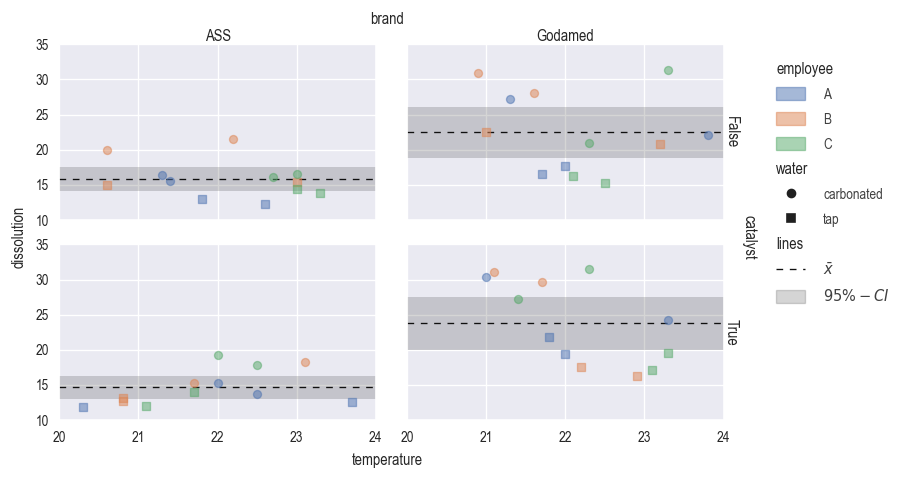

In [4]:
dsp.style.use('seaborn')
chart = dsp.MultipleVariateChart(
        source=df,
        target='dissolution',
        feature='temperature',
        hue='employee',
        shape='water',
        col='brand',
        row='catalyst',
        stretch_figsize=False
    ).plot(
        dsp.Scatter
    ).stripes(
        mean=True,
        confidence=0.95
    ).label(
        feature_label=True,
        target_label=True
    )

In [ ]:
ALPHA = 0.05
model = dsp.LinearModel(
    source=df,
    target='dissolution',
    categorical=[
        'employee',
        'stirrer',
        'brand',
        'catalyst',
        'water'],
    continuous=['temperature'],
    alpha=ALPHA,
    order=2)

goodness_of_fit_gen = model.recursive_feature_elimination()
df_gof = pd.concat(goodness_of_fit_gen)

# rename columns for mathematical notation
columns_map = {
    'p_least': '$p_{least}$',
    'r2': '$r^2$',
    'r2_adj': '$r^2_{adj}$',
    'r2_pred': '$r^2_{pred}$'}
data = df_gof.rename(columns=columns_map)
 reshape into long format
data = pd.melt(
    data, value_vars=columns_map.values(), var_name='metric')

chart = dsp.SingleChart(
        source=data,
        target='value',
        hue='metric'
    ).plot(
        dsp.Line
    ).stripes(
        stripes=[dsp.StripeLine(r'\alpha', ALPHA, color='red')]
    ).label(
        fig_title='Goodness of fit',
        sub_title='Different metrics during recursive feature elimination',
        target_label=True,
        feature_label='elimination step'
    )
_ = chart.axes[0, 0].set(ylim=(0, 1))

In [ ]:
dsp.ResidualsCharts(model).plot().label()
dsp.ParameterRelevanceCharts(model).plot().label()
model

In [ ]:
chart = dsp.MultipleVariateChart(
        source=df,
        target='dissolution',
        feature='water',
        col='brand',
        hue='employee',
        dodge=True,
    ).plot(
        dsp.Jitter
    ).plot(
        dsp.SpreadWidth,
        agreement=6,
        strategy='norm',
        bars_same_color=True
    ).stripes(
        mean=True,
        confidence=0.95
    ).label(
        fig_title='Aspirin Dissolution Process Analysis',
        sub_title='Expected spread (6σ) based on the normal distribution',
        feature_label=True,
        target_label='Dissolution time (s)'
    )